In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Importo libreria para trabajar con dates 
from datetime import timedelta
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para normalizar
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_excel('Trabajocoder.xlsx', sheet_name='1')

In [ ]:
# Análisis Exploratorio y Formulación de Hipótesis

# Este script realiza un análisis exploratorio inicial del dataset de una base de datos de una compañía de seguros,
# que incluye pagos de pólizas Agosto22 a Agosto24, datos socio-demográficos de los asegurados y siniestros.
# El objetivo del análisis exploratorio es obtener una comprensión preliminar de los datos, 
# identificar patrones, posibles anomalías y verificar la calidad de los datos.

# Después del análisis exploratorio, se procederá a formular preguntas clave e hipótesis
# basadas en los resultados del análisis, para luego profundizar en un análisis más detallado.

# Los siguientes pasos se llevarán a cabo:
# 1. Exploración de la estructura y calidad de los datos.
# 2. Limpieza de los datos en caso de que se detecten anomalías o valores nulos.
# 3. Visualización de las distribuciones de las variables principales, como siniestros, cobros y primas.
# 4. Formulación de hipótesis y preguntas de negocio basadas en el análisis inicial. LA HIPÓTESIS VA A SER QUE EL SINIESTRO ES UN FACTOR DE FIDELIZACIÓN
# 5. Validación de hipótesis mediante análisis estadístico y visualización de datos.

# El análisis se centra en entender cómo las variables de siniestros, primas y tipo de seguro están relacionadas entre sí
# y qué factores podrían estar asociados con una mayor ocurrencia de siniestros.





In [ ]:
# 1. Exploración de la estructura y calidad de los datos.

In [4]:
# Información general del DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114259 entries, 0 to 114258
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Asegurado               114259 non-null  object        
 1   Fecha                   114259 non-null  datetime64[ns]
 2   Forma de pago           114259 non-null  object        
 3   Tipo de seguro          114259 non-null  int64         
 4   Póliza                  114259 non-null  int64         
 5   Endoso                  114259 non-null  int64         
 6   Provincia               114259 non-null  object        
 7   Moneda                  114259 non-null  object        
 8   Prima                   114259 non-null  object        
 9   Premio                  114259 non-null  object        
 10  Comisión normal         114259 non-null  object        
 11  Comisión cobranza       114259 non-null  object        
 12  Comisión fomento        114259

In [ ]:
##VOY A EXPLORAR LA COLUMNA FECHA PORQUE ESTÁ COMO DATE TIME Y PARA LOS ANÁLISIS ME INTERESA TENERLA DE FORMA NOMINAL POR MES

In [8]:
# Mostrar los nombres exactos de las columnas, incluyendo caracteres ocultos
print(repr(df.columns.tolist()))


['Asegurado', 'Fecha ', 'Forma de pago', 'Tipo de seguro', 'Póliza', 'Endoso', 'Provincia', 'Moneda', 'Prima', 'Premio', 'Comisión normal', 'Comisión cobranza', 'Comisión fomento', 'Comisión otras', 'Comisión total', 'Tipo Persona', 'CUIT', 'DNI', 'fecha de nacimiento', 'Domicilio', 'Pólizas contratadas', 'id', 'sexo', 'Cantidad robos totales', 'Cantidad robo ruedas', 'Cantidad robos general', 'Cantidad choques', 'Cantidad stros gral']


In [ ]:
# FECHA TIENE ESPACIOS QUE TENGO QUE BORRAR

In [9]:
# Eliminar espacios en blanco al inicio y al final de los nombres de columnas
df.columns = df.columns.str.strip()


In [10]:
print(df['Fecha'].head())


0   2022-08-02
1   2022-08-02
2   2022-08-02
3   2022-08-17
4   2022-08-17
Name: Fecha, dtype: datetime64[ns]


In [11]:
# Quiero verificar la cantidad de cobros que hay por mes, esto lo hago de la siguiente forma. Columna 'Fecha' esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Crear una columna 'AñoMes' con el año y mes
df['AñoMes'] = df['Fecha'].dt.to_period('M')

# Contar la cantidad de registros por cada mes
conteo_por_mes = df['AñoMes'].value_counts().sort_index()

# Mostrar el resultado
print(conteo_por_mes)


AñoMes
2022-07      22
2022-08    3508
2022-09    3507
2022-10    3490
2022-11    3844
2022-12    3800
2023-01    3852
2023-02    3842
2023-03    4309
2023-04    4118
2023-05    4247
2023-06    4246
2023-07    5097
2023-08    4720
2023-09    4725
2023-10    4806
2023-11    4915
2023-12    4942
2024-01    5070
2024-02    5070
2024-03    5512
2024-04    5402
2024-05    5397
2024-06    5270
2024-07    5271
2024-08    5277
Freq: M, Name: count, dtype: int64


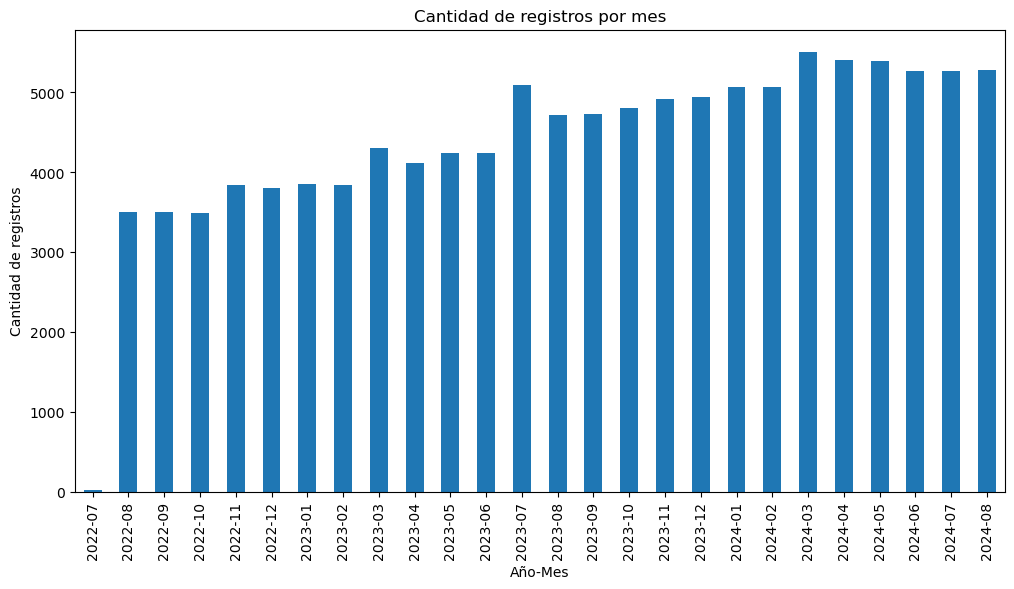

In [12]:
# Visualizar la cantidad de registros por mes
conteo_por_mes.plot(kind='bar', figsize=(12,6))
plt.title('Cantidad de registros por mes')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de registros')
plt.show()


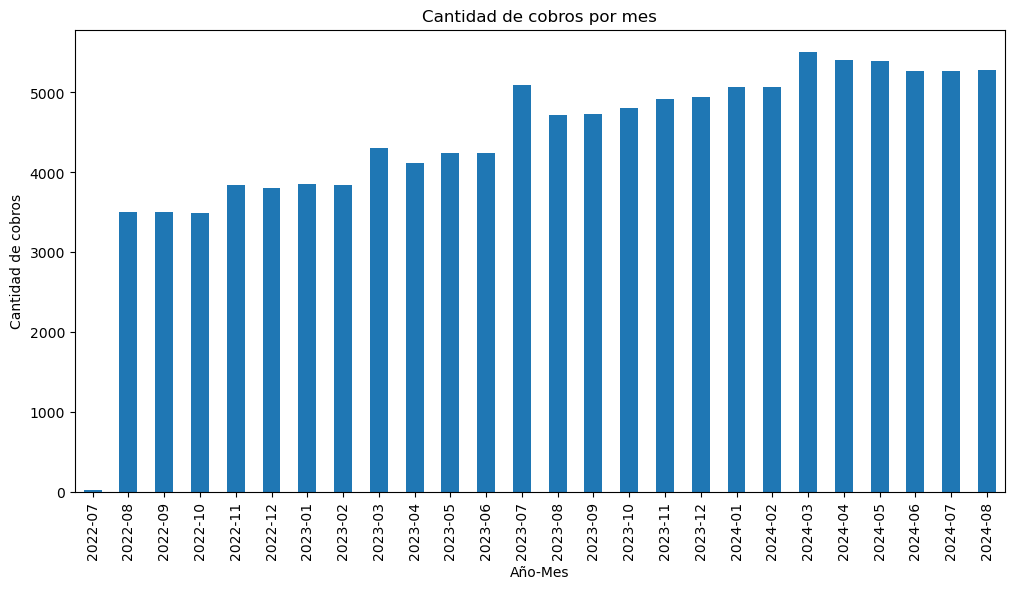

In [13]:
# Visualizar la cantidad de cobros por mes
conteo_por_mes.plot(kind='bar', figsize=(12,6))
plt.title('Cantidad de cobros por mes')
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad de cobros')
plt.show()


In [14]:
print(df.describe(include='all'))


                           Asegurado                          Fecha  \
count                         114259                         114259   
unique                          2033                            NaN   
top     SERRANO VERONICA GUILLERMINA                            NaN   
freq                             485                            NaN   
mean                             NaN  2023-09-14 10:05:38.830201344   
min                              NaN            2022-07-04 00:00:00   
25%                              NaN            2023-03-17 00:00:00   
50%                              NaN            2023-09-28 00:00:00   
75%                              NaN            2024-03-18 00:00:00   
max                              NaN            2024-08-31 00:00:00   
std                              NaN                            NaN   

       Forma de pago  Tipo de seguro        Póliza         Endoso  \
count         114259   114259.000000  1.142590e+05  114259.000000   
unique   

In [15]:
print(df.isnull().sum())


Asegurado                     0
Fecha                         0
Forma de pago                 0
Tipo de seguro                0
Póliza                        0
Endoso                        0
Provincia                     0
Moneda                        0
Prima                         0
Premio                        0
Comisión normal               0
Comisión cobranza             0
Comisión fomento              0
Comisión otras                0
Comisión total                0
Tipo Persona                  0
CUIT                        271
DNI                        2215
fecha de nacimiento        5868
Domicilio                     0
Pólizas contratadas       19994
id                            0
sexo                          0
Cantidad robos totales        0
Cantidad robo ruedas          0
Cantidad robos general        0
Cantidad choques              0
Cantidad stros gral           0
AñoMes                        0
dtype: int64


In [16]:
for col in df.select_dtypes(include='object').columns:
    print(f"Columna '{col}' tiene {df[col].nunique()} valores únicos")
    print(df[col].value_counts())


Columna 'Asegurado' tiene 2033 valores únicos
Asegurado
SERRANO VERONICA GUILLERMINA    485
JANEZIC ANDRES                  420
HOURMILOUGUE SEBASTIAN          389
SCHMIDT ROBERTO CARLOS          377
LOPEZ IGNACIO                   367
                               ... 
JIMENEZ ISMAEL                    1
RODRIGUEZ MARCELO DANIEL          1
ROMERO THOMAS AGUSTIN             1
NEOFLEX SRL                       1
TESEYRA JOSE ALEJANDRO            1
Name: count, Length: 2033, dtype: int64
Columna 'Forma de pago' tiene 19 valores únicos
Forma de pago
DEBI    60127
PAGF    23189
PROD     7936
AJUS     5770
PMC      5733
EXPR     3764
RAPI     2369
LINK     2328
WEBS     1247
DEVO      558
PNET      442
AFIP      346
ART       110
PLUS      105
RIPS      103
PA24       61
DESC       50
MULT       13
PRON        8
Name: count, dtype: int64
Columna 'Provincia' tiene 17 valores únicos
Provincia
BUENOS AIRES           106350
CAPITAL                  4207
CORDOBA                   773
SANTA FE  

In [17]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Columna '{col}': mínimo = {df[col].min()}, máximo = {df[col].max()}")


Columna 'Tipo de seguro': mínimo = 1, máximo = 80
Columna 'Póliza': mínimo = 104102, máximo = 32692265
Columna 'Endoso': mínimo = 0, máximo = 77
Columna 'Comisión fomento': mínimo = -53.8, máximo = 610.01
Columna 'Comisión otras': mínimo = 0, máximo = 0
Columna 'CUIT': mínimo = 2422601.0, máximo = 33716591269.0
Columna 'DNI': mínimo = 2350367.0, máximo = 266256227.0
Columna 'Cantidad robos totales': mínimo = 0, máximo = 1
Columna 'Cantidad robo ruedas': mínimo = 0, máximo = 2
Columna 'Cantidad robos general': mínimo = 0, máximo = 6
Columna 'Cantidad choques': mínimo = 0, máximo = 6
Columna 'Cantidad stros gral': mínimo = 0, máximo = 9


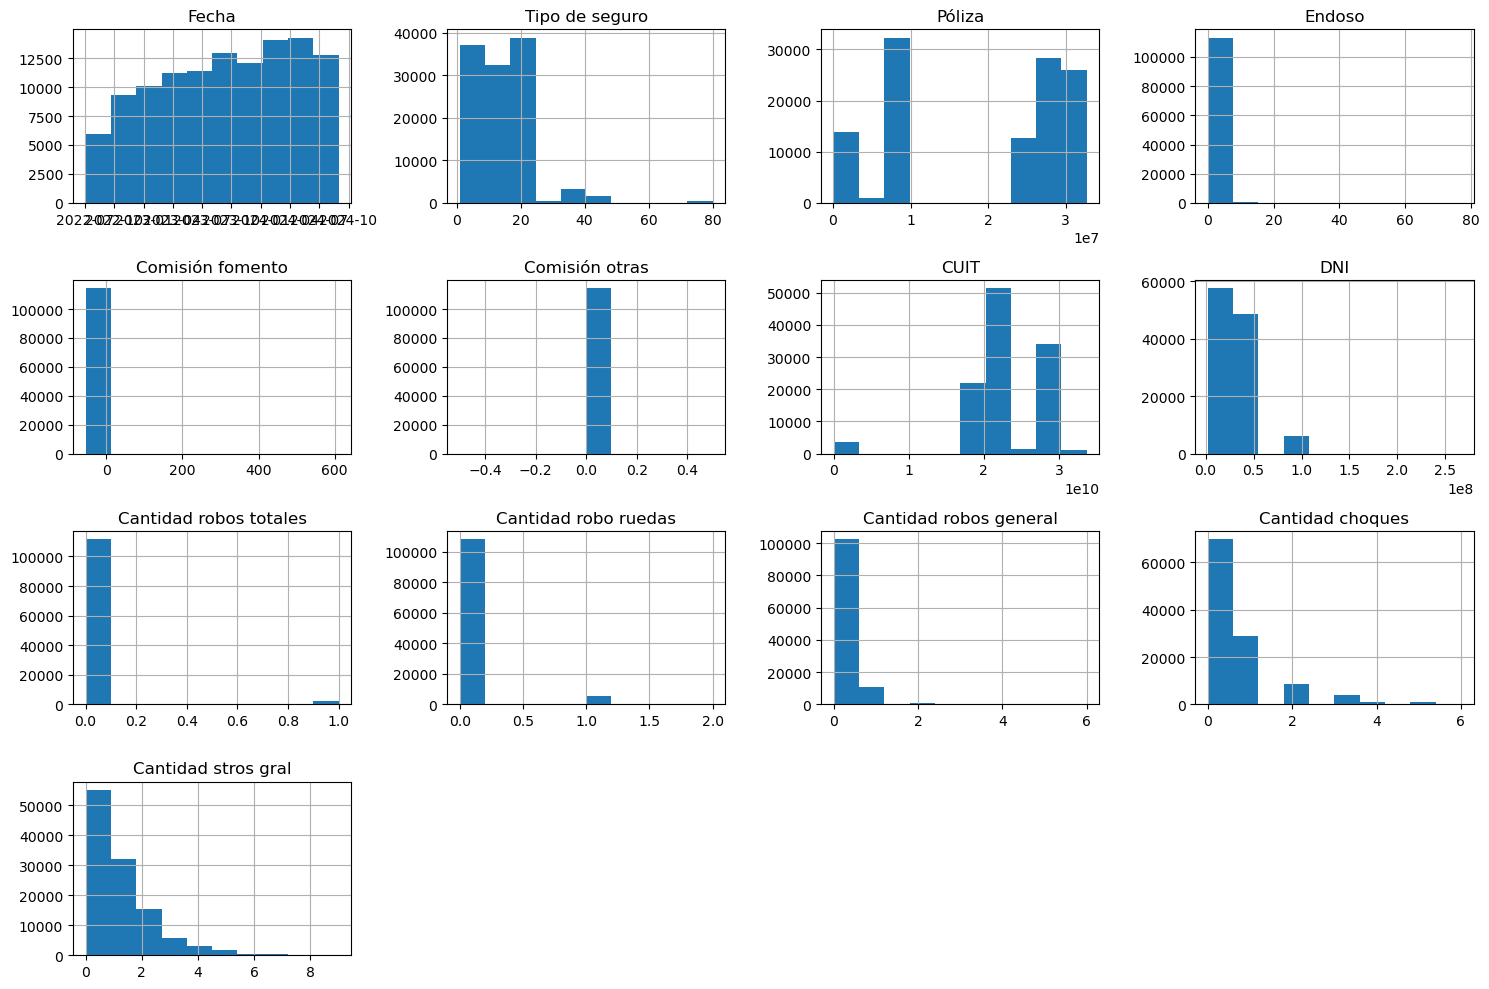

In [18]:
import matplotlib.pyplot as plt
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()


c:\Users\Fernando\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


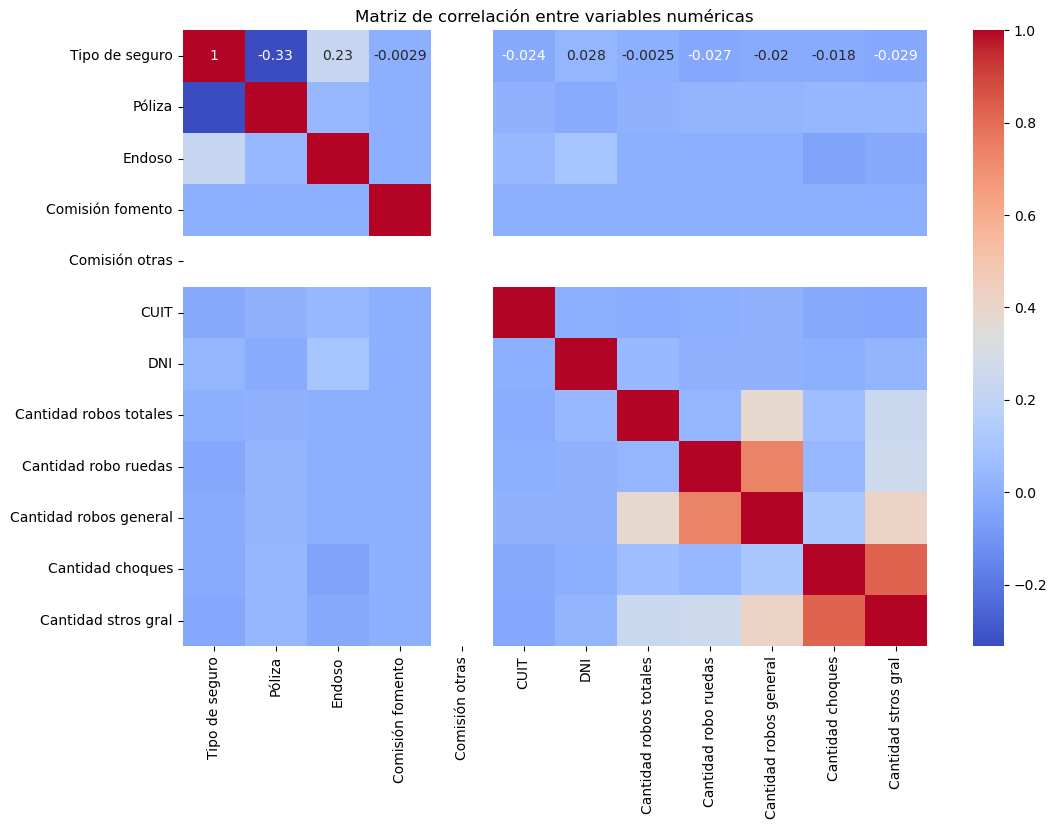

In [20]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Crear la matriz de correlación con las columnas numéricas
corr_matrix = numeric_cols.corr()

# Generar el mapa de calor
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


In [ ]:
## ME INTERESA SUMAR HABER COMO SE CORRELACIONAN Y COMPORTAN LA VARIABLE FECHA DE NACIMIENTO Y SEXO

In [22]:
# Asegurar que 'fecha de nacimiento' esté en formato datetime
df['fecha de nacimiento'] = pd.to_datetime(df['fecha de nacimiento'], errors='coerce')

# Calcular la edad en años
from datetime import datetime

# Fecha actual (puedes establecer una fecha fija si lo prefieres)
fecha_actual = datetime.now()

# Crear una nueva columna 'edad'
df['edad'] = df['fecha de nacimiento'].apply(lambda x: (fecha_actual - x).days // 365 if pd.notnull(x) else None)


In [23]:
# Verificar los valores únicos en la columna 'sexo'
print(df['sexo'].unique())


['Masculino' 'Femenino' 'empresa']


In [24]:
# Crear variables dummy para 'sexo'
sexo_dummies = pd.get_dummies(df['sexo'], prefix='sexo')

# Unir las variables dummy al DataFrame original
df = pd.concat([df, sexo_dummies], axis=1)


c:\Users\Fernando\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


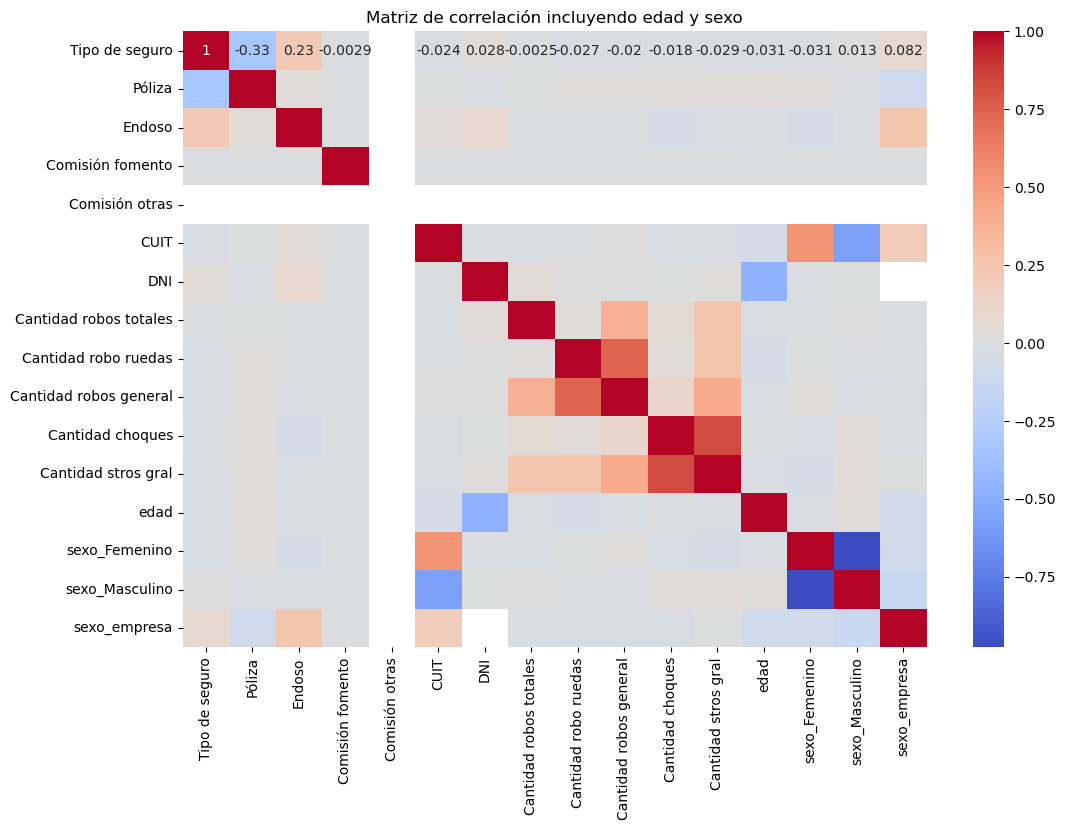

In [25]:
# Asegurarte de que 'edad' está incluida y es numérica
# (Si no lo has hecho aún, calcula 'edad' como se mostró anteriormente)

# Seleccionar las columnas numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Añadir la columna 'edad' si aún no está en numeric_cols
if 'edad' not in numeric_cols:
    numeric_cols.append('edad')

# Añadir las variables dummy de 'sexo' a las columnas numéricas
numeric_cols.extend(['sexo_Femenino', 'sexo_Masculino', 'sexo_empresa'])

# Crear un DataFrame solo con las columnas numéricas para el análisis
df_numeric = df[numeric_cols]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Generar el mapa de calor de correlaciones
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación incluyendo edad y sexo')
plt.show()


In [26]:
# Paso 1: Crear intervalos de edad
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución
tabla_distribucion = pd.crosstab(df['edad_intervalo'], df['sexo'])

# Paso 3: Mostrar la tabla
print(tabla_distribucion)


sexo            Femenino  Masculino  empresa
edad_intervalo                              
0-17                  24          4      199
18-24                977       1386       61
25-34               7239      10897        0
35-44              12107      18822        0
45-54              10553      14884       56
55-64               7836       9628        1
65+                 4408       9257       52


In [27]:
# Paso 1: Crear intervalos de edad (si aún no lo has hecho)
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100

# Paso 3: Mostrar la tabla con porcentajes formateados
print(tabla_distribucion_porcentaje.round(2))


sexo            Femenino  Masculino  empresa
edad_intervalo                              
0-17               10.57       1.76    87.67
18-24              40.31      57.18     2.52
25-34              39.92      60.08     0.00
35-44              39.14      60.86     0.00
45-54              41.40      58.38     0.22
55-64              44.87      55.13     0.01
65+                32.14      67.49     0.38


In [28]:
# Paso 1: Crear intervalos de edad
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad choques' para cada grupo
promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()
promedio_choques = promedio_choques.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_choques.columns = [f'{col} (Promedio Choques)' for col in promedio_choques.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_choques], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
0-17                   10.57           1.76        87.67   
18-24                  40.31          57.18         2.52   
25-34                  39.92          60.08         0.00   
35-44                  39.14          60.86         0.00   
45-54                  41.40          58.38         0.22   
55-64                  44.87          55.13         0.01   
65+                    32.14          67.49         0.38   

                Femenino (Promedio Choques)  Masculino (Promedio Choques)  \
edad_intervalo                                                              
0-17                                   0.00                          0.00   
18-24                                  0.65                          0.48   
25-34                                  0.61                          0.68   
35-44                                  0.51                          0.65 

C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\3539123561.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()


In [29]:
# Paso 1: Crear los nuevos intervalos de edad
bins = [0, 36, 51, df['edad'].max()+1]
labels = ['Hasta 35 años', '36 a 50 años', 'Más de 51 años']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad choques' para cada grupo
promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()
promedio_choques = promedio_choques.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_choques.columns = [f'{col} (Promedio Choques)' for col in promedio_choques.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_choques], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
Hasta 35 años          40.57          58.30         1.13   
36 a 50 años           39.14          60.74         0.13   
Más de 51 años         40.10          59.77         0.13   

                Femenino (Promedio Choques)  Masculino (Promedio Choques)  \
edad_intervalo                                                              
Hasta 35 años                          0.58                          0.66   
36 a 50 años                           0.55                          0.65   
Más de 51 años                         0.60                          0.63   

                empresa (Promedio Choques)  
edad_intervalo                              
Hasta 35 años                          0.0  
36 a 50 años                           0.0  
Más de 51 años                         0.0  


C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\3716207882.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_choques = df.groupby(['edad_intervalo', 'sexo'])['Cantidad choques'].mean().unstack()


In [30]:
# Paso 1: Crear los nuevos intervalos de edad (si aún no lo has hecho)
bins = [0, 36, 51, df['edad'].max()+1]
labels = ['Hasta 35 años', '36 a 50 años', 'Más de 51 años']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad robo ruedas' para cada grupo
promedio_robo_ruedas = df.groupby(['edad_intervalo', 'sexo'])['Cantidad robo ruedas'].mean().unstack()
promedio_robo_ruedas = promedio_robo_ruedas.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_robo_ruedas.columns = [f'{col} (Prom. Robo Ruedas)' for col in promedio_robo_ruedas.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_robo_ruedas], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
Hasta 35 años          40.57          58.30         1.13   
36 a 50 años           39.14          60.74         0.13   
Más de 51 años         40.10          59.77         0.13   

                Femenino (Prom. Robo Ruedas)  Masculino (Prom. Robo Ruedas)  \
edad_intervalo                                                                
Hasta 35 años                           0.06                           0.09   
36 a 50 años                            0.08                           0.05   
Más de 51 años                          0.04                           0.04   

                empresa (Prom. Robo Ruedas)  
edad_intervalo                               
Hasta 35 años                           0.0  
36 a 50 años                            0.0  
Más de 51 años                          0.0  


C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\602951481.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_robo_ruedas = df.groupby(['edad_intervalo', 'sexo'])['Cantidad robo ruedas'].mean().unstack()


In [32]:
# Paso 1: Crear los intervalos de edad (si aún no lo has hecho)
bins = [0, 36, 51, df['edad'].max()+1]
labels = ['Hasta 35 años', '36 a 50 años', 'Más de 51 años']
df['edad_intervalo'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

# Paso 2: Generar la tabla de distribución en porcentajes
tabla_distribucion_porcentaje = pd.crosstab(df['edad_intervalo'], df['sexo'], normalize='index') * 100
tabla_distribucion_porcentaje = tabla_distribucion_porcentaje.round(2)

# Paso 3: Calcular el promedio de 'Cantidad stros gral' para cada grupo
promedio_stros_gral = df.groupby(['edad_intervalo', 'sexo'])['Cantidad stros gral'].mean().unstack()
promedio_stros_gral = promedio_stros_gral.round(2)

# Paso 4: Renombrar columnas para claridad
tabla_distribucion_porcentaje.columns = [f'{col} (%)' for col in tabla_distribucion_porcentaje.columns]
promedio_stros_gral.columns = [f'{col} (Prom. Stros Gral)' for col in promedio_stros_gral.columns]

# Paso 5: Combinar las tablas
tabla_final = pd.concat([tabla_distribucion_porcentaje, promedio_stros_gral], axis=1)

# Paso 6: Mostrar la tabla final
print(tabla_final)


                Femenino (%)  Masculino (%)  empresa (%)  \
edad_intervalo                                             
Hasta 35 años          40.57          58.30         1.13   
36 a 50 años           39.14          60.74         0.13   
Más de 51 años         40.10          59.77         0.13   

                Femenino (Prom. Stros Gral)  Masculino (Prom. Stros Gral)  \
edad_intervalo                                                              
Hasta 35 años                          0.86                          0.96   
36 a 50 años                           0.88                          1.09   
Más de 51 años                         0.90                          0.90   

                empresa (Prom. Stros Gral)  
edad_intervalo                              
Hasta 35 años                         0.45  
36 a 50 años                          0.00  
Más de 51 años                        0.98  


C:\Users\Fernando\AppData\Local\Temp\ipykernel_2584\262466830.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio_stros_gral = df.groupby(['edad_intervalo', 'sexo'])['Cantidad stros gral'].mean().unstack()


In [7]:
# Mostrar los nombres de las columnas
print(df.columns.tolist())


['Asegurado', 'Fecha ', 'Forma de pago', 'Tipo de seguro', 'Póliza', 'Endoso', 'Provincia', 'Moneda', 'Prima', 'Premio', 'Comisión normal', 'Comisión cobranza', 'Comisión fomento', 'Comisión otras', 'Comisión total', 'Tipo Persona', 'CUIT', 'DNI', 'fecha de nacimiento', 'Domicilio', 'Pólizas contratadas', 'id', 'sexo', 'Cantidad robos totales', 'Cantidad robo ruedas', 'Cantidad robos general', 'Cantidad choques', 'Cantidad stros gral']


In [8]:
import pandas as pd

# Cargar los datos en el DataFrame df
df = pd.read_excel('Trabajocoder.xlsx', sheet_name='1')

# Eliminar espacios en blanco en los nombres de las columnas
df.columns = df.columns.str.strip()

# Verificar los nombres de las columnas
print(df.columns.tolist())

# Convertir la columna 'Fecha' al tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Continuar con el resto del código...


['Asegurado', 'Fecha', 'Forma de pago', 'Tipo de seguro', 'Póliza', 'Endoso', 'Provincia', 'Moneda', 'Prima', 'Premio', 'Comisión normal', 'Comisión cobranza', 'Comisión fomento', 'Comisión otras', 'Comisión total', 'Tipo Persona', 'CUIT', 'DNI', 'fecha de nacimiento', 'Domicilio', 'Pólizas contratadas', 'id', 'sexo', 'Cantidad robos totales', 'Cantidad robo ruedas', 'Cantidad robos general', 'Cantidad choques', 'Cantidad stros gral']


In [9]:
# Definir los rangos de fechas
fecha_inicio = pd.to_datetime('2022-08-01')
fecha_fin = pd.to_datetime('2024-06-30')

# Últimos dos meses: julio y agosto de 2024
fecha_julio_2024_inicio = pd.to_datetime('2024-07-01')
fecha_agosto_2024_fin = pd.to_datetime('2024-08-31')

# Filtrar clientes en el periodo completo (agosto 2022 - junio 2024)
df_periodo_entero = df[(df['Fecha'] >= fecha_inicio) & (df['Fecha'] <= fecha_fin)]

# Filtrar clientes en julio y agosto de 2024
df_julio_agosto_2024 = df[(df['Fecha'] >= fecha_julio_2024_inicio) & (df['Fecha'] <= fecha_agosto_2024_fin)]

# Obtener DNIs de clientes en el periodo completo
dnies_periodo_entero = set(df_periodo_entero['DNI'].dropna().unique())

# Obtener DNIs de clientes en julio y agosto de 2024
dnies_julio_agosto_2024 = set(df_julio_agosto_2024['DNI'].dropna().unique())

# Identificar DNIs de clientes que ya no están
dnies_ya_no_estan = dnies_periodo_entero - dnies_julio_agosto_2024

# Extraer las filas completas de estos clientes
df_clientes_ya_no_estan = df[df['DNI'].isin(dnies_ya_no_estan)]

# Si solo quieres las filas del periodo inicial
df_clientes_ya_no_estan = df_clientes_ya_no_estan[(df_clientes_ya_no_estan['Fecha'] >= fecha_inicio) & (df_clientes_ya_no_estan['Fecha'] <= fecha_fin)]

# Mostrar el resultado
print(df_clientes_ya_no_estan)


                        Asegurado      Fecha Forma de pago  Tipo de seguro  \
544     PINTOS JUDZISKI ALEJANDRO 2022-08-01          EXPR               4   
545     PINTOS JUDZISKI ALEJANDRO 2022-08-01          EXPR              12   
546     PINTOS JUDZISKI ALEJANDRO 2022-08-01          EXPR              19   
566     MAGNONE RICARDO ALEXANDER 2022-08-08          PAGF               4   
567     MAGNONE RICARDO ALEXANDER 2022-08-08          PAGF              12   
...                           ...        ...           ...             ...   
104187     LEUZE ROMINA FLORENCIA 2024-06-30          AJUS               4   
104188     LEUZE ROMINA FLORENCIA 2024-06-30          AJUS              12   
104189     LEUZE ROMINA FLORENCIA 2024-06-30          AJUS              12   
104190     LEUZE ROMINA FLORENCIA 2024-06-30          AJUS              19   
104191     LEUZE ROMINA FLORENCIA 2024-06-30          AJUS              19   

          Póliza  Endoso     Provincia Moneda      Prima     Pr

In [10]:
# Exportar el DataFrame a un archivo Excel
df_clientes_ya_no_estan.to_excel('clientes_ya_no_estan.xlsx', index=False)


In [11]:
# Convertir 'Fecha' a datetime
df_clientes_ya_no_estan['Fecha'] = pd.to_datetime(df_clientes_ya_no_estan['Fecha'], errors='coerce')


In [12]:
# Ordenar por 'DNI' y 'Fecha' en orden ascendente
df_clientes_ya_no_estan.sort_values(['DNI', 'Fecha'], inplace=True)


In [13]:
# Eliminar duplicados y mantener la última aparición de cada 'DNI'
df_unico_por_dni = df_clientes_ya_no_estan.drop_duplicates(subset='DNI', keep='last')


In [14]:
# Exportar a un archivo Excel
df_unico_por_dni.to_excel('clientes_ya_no_estan_unico_por_dni.xlsx', index=False)


In [15]:
print("El archivo 'clientes_ya_no_estan_unico_por_dni.xlsx' ha sido guardado exitosamente.")


El archivo 'clientes_ya_no_estan_unico_por_dni.xlsx' ha sido guardado exitosamente.


In [16]:
# Filtrar clientes que tuvieron al menos un siniestro
clientes_con_siniestros = df_unico_por_dni[df_unico_por_dni['Cantidad stros gral'] > 0]

# Mostrar el resultado
print(clientes_con_siniestros)


                                   Asegurado      Fecha Forma de pago  \
4873                            LASCIA NOEMI 2024-03-15          AJUS   
67317               MACCIROLO CARLOS ALBERTO 2023-11-15          AJUS   
77552                       TORQUI JOSE RAUL 2024-01-23          AJUS   
102471                     ALVAREZ JUAN JOSE 2024-06-19           PMC   
99335                        BAEZ JOSE ANGEL 2024-06-03          PROD   
...                                      ...        ...           ...   
63312        JARA VILLALBA FRANCISCO ANTONIO 2023-10-18          DEBI   
64264          CAREAGA MELGAREJO JUAN CARLOS 2023-10-25          AJUS   
53149               RODRIGUEZ GARCETE NELSON 2023-08-10          AJUS   
32892               GODOY VIANA JUAN DOMINGO 2023-03-14          AJUS   
96900   BRUZUAL GIL RAFAEL HUMBERTO DE JESUS 2024-05-14          AJUS   

        Tipo de seguro    Póliza  Endoso     Provincia Moneda  \
4873                19  27380363       1  BUENOS AIRES    

In [18]:
# Filtrar clientes que tuvieron al menos un siniestro
clientes_con_siniestros = df_unico_por_dni[df_unico_por_dni['Cantidad stros gral'] > 0]


In [19]:
# Exportar el DataFrame filtrado a un archivo Excel
clientes_con_siniestros.to_excel('clientes_con_siniestros_unico_por_cliente.xlsx', index=False)


In [20]:
# Asegúrate de que 'DNI' está en formato numérico y no tiene valores nulos
df['DNI'] = pd.to_numeric(df['DNI'], errors='coerce')
df = df.dropna(subset=['DNI'])

# Convertir 'Fecha' a datetime si no lo has hecho
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')


In [21]:
# Ordenar por 'DNI' y 'Fecha'
df.sort_values(['DNI', 'Fecha'], inplace=True)

# Obtener la última fila por 'DNI' (cliente)
df_ultimo_por_dni = df.drop_duplicates(subset='DNI', keep='last')


In [22]:
# Fechas para julio y agosto de 2024
fecha_julio_2024_inicio = pd.to_datetime('2024-07-01')
fecha_agosto_2024_fin = pd.to_datetime('2024-08-31')

# Filtrar clientes en julio y agosto de 2024
df_julio_agosto_2024 = df[(df['Fecha'] >= fecha_julio_2024_inicio) & (df['Fecha'] <= fecha_agosto_2024_fin)]

# Obtener DNIs de clientes vigentes
dnies_vigentes = set(df_julio_agosto_2024['DNI'].unique())


In [23]:
# Marcar si el cliente está vigente
df_ultimo_por_dni['esta_vigente'] = df_ultimo_por_dni['DNI'].apply(lambda x: 1 if x in dnies_vigentes else 0)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3896683205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ultimo_por_dni['esta_vigente'] = df_ultimo_por_dni['DNI'].apply(lambda x: 1 if x in dnies_vigentes else 0)


In [24]:
promedio_siniestros_por_estado = df_ultimo_por_dni.groupby('esta_vigente')['Cantidad stros gral'].mean()
print(promedio_siniestros_por_estado)


esta_vigente
0    0.330709
1    0.729912
Name: Cantidad stros gral, dtype: float64


In [25]:
from scipy.stats import ttest_ind

# Separar los grupos
siniestros_vigentes = df_ultimo_por_dni[df_ultimo_por_dni['esta_vigente'] == 1]['Cantidad stros gral']
siniestros_no_vigentes = df_ultimo_por_dni[df_ultimo_por_dni['esta_vigente'] == 0]['Cantidad stros gral']

# Realizar la prueba t
t_stat, p_value = ttest_ind(siniestros_no_vigentes, siniestros_vigentes, equal_var=False)

print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -9.121122078714535, p-value: 2.7832179687535083e-19


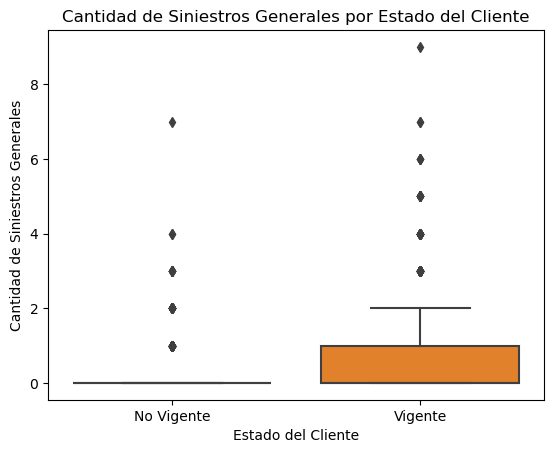

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='esta_vigente', y='Cantidad stros gral', data=df_ultimo_por_dni)
plt.xticks([0,1], ['No Vigente', 'Vigente'])
plt.title('Cantidad de Siniestros Generales por Estado del Cliente')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Siniestros Generales')
plt.show()


In [28]:
# Asegurar que 'fecha de nacimiento' está en formato datetime
df_unico_por_dni['fecha de nacimiento'] = pd.to_datetime(df_unico_por_dni['fecha de nacimiento'], errors='coerce')

# Calcular la edad en años
from datetime import datetime

# Usar la última fecha registrada para calcular la edad
df_unico_por_dni['edad'] = df_unico_por_dni.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) else None,
    axis=1
)

# Verificar los valores únicos en 'sexo'
print(df_unico_por_dni['sexo'].unique())


['Femenino' 'Masculino']


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3397679481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico_por_dni['fecha de nacimiento'] = pd.to_datetime(df_unico_por_dni['fecha de nacimiento'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3397679481.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico_por_dni['edad'] = df_unico_por_dni.apply(


In [30]:
print(df_unico_por_dni.columns.tolist())


['Asegurado', 'Fecha', 'Forma de pago', 'Tipo de seguro', 'Póliza', 'Endoso', 'Provincia', 'Moneda', 'Prima', 'Premio', 'Comisión normal', 'Comisión cobranza', 'Comisión fomento', 'Comisión otras', 'Comisión total', 'Tipo Persona', 'CUIT', 'DNI', 'fecha de nacimiento', 'Domicilio', 'Pólizas contratadas', 'id', 'sexo', 'Cantidad robos totales', 'Cantidad robo ruedas', 'Cantidad robos general', 'Cantidad choques', 'Cantidad stros gral', 'edad']


In [31]:
print(df_unico_por_dni.columns.tolist())


['Asegurado', 'Fecha', 'Forma de pago', 'Tipo de seguro', 'Póliza', 'Endoso', 'Provincia', 'Moneda', 'Prima', 'Premio', 'Comisión normal', 'Comisión cobranza', 'Comisión fomento', 'Comisión otras', 'Comisión total', 'Tipo Persona', 'CUIT', 'DNI', 'fecha de nacimiento', 'Domicilio', 'Pólizas contratadas', 'id', 'sexo', 'Cantidad robos totales', 'Cantidad robo ruedas', 'Cantidad robos general', 'Cantidad choques', 'Cantidad stros gral', 'edad']


In [32]:
# Asegurar que 'DNI' es numérico y no tiene valores nulos
df_unico_por_dni['DNI'] = pd.to_numeric(df_unico_por_dni['DNI'], errors='coerce')
df_unico_por_dni.dropna(subset=['DNI'], inplace=True)

# Convertir 'Fecha' a datetime si no lo has hecho
df_unico_por_dni['Fecha'] = pd.to_datetime(df_unico_por_dni['Fecha'], errors='coerce')

# Definir las fechas para julio y agosto de 2024
fecha_julio_2024_inicio = pd.to_datetime('2024-07-01')
fecha_agosto_2024_fin = pd.to_datetime('2024-08-31')

# Identificar los DNIs de los clientes vigentes en julio y agosto de 2024
dnies_vigentes = df_unico_por_dni[
    (df_unico_por_dni['Fecha'] >= fecha_julio_2024_inicio) & 
    (df_unico_por_dni['Fecha'] <= fecha_agosto_2024_fin)
]['DNI'].unique()

# Crear la columna 'esta_vigente' en df_unico_por_dni
df_unico_por_dni['esta_vigente'] = df_unico_por_dni['DNI'].apply(
    lambda x: 1 if x in dnies_vigentes else 0
)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\300407950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico_por_dni['DNI'] = pd.to_numeric(df_unico_por_dni['DNI'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\300407950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico_por_dni.dropna(subset=['DNI'], inplace=True)
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\300407950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [33]:
print(df_unico_por_dni.columns.tolist())


['Asegurado', 'Fecha', 'Forma de pago', 'Tipo de seguro', 'Póliza', 'Endoso', 'Provincia', 'Moneda', 'Prima', 'Premio', 'Comisión normal', 'Comisión cobranza', 'Comisión fomento', 'Comisión otras', 'Comisión total', 'Tipo Persona', 'CUIT', 'DNI', 'fecha de nacimiento', 'Domicilio', 'Pólizas contratadas', 'id', 'sexo', 'Cantidad robos totales', 'Cantidad robo ruedas', 'Cantidad robos general', 'Cantidad choques', 'Cantidad stros gral', 'edad', 'esta_vigente']


In [35]:
# Filtrar clientes que ya no están vigentes
clientes_no_vigentes = df_unico_por_dni[df_unico_por_dni['esta_vigente'] == 0]

# Filtrar clientes que tuvieron siniestros
clientes_siniestros_no_vigentes = clientes_no_vigentes[clientes_no_vigentes['Cantidad stros gral'] > 0]


In [36]:
# Asegurar que 'fecha de nacimiento' está en formato datetime
clientes_siniestros_no_vigentes['fecha de nacimiento'] = pd.to_datetime(clientes_siniestros_no_vigentes['fecha de nacimiento'], errors='coerce')

# Calcular la edad en años
clientes_siniestros_no_vigentes['edad'] = clientes_siniestros_no_vigentes.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) else None,
    axis=1
)

# Continuar con el análisis como antes...


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\657573691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['fecha de nacimiento'] = pd.to_datetime(clientes_siniestros_no_vigentes['fecha de nacimiento'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\657573691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['edad'] = clientes_siniestros_no_vigentes.apply(


In [37]:
# Filtrar clientes que ya no están vigentes
clientes_no_vigentes = df_unico_por_dni[df_unico_por_dni['esta_vigente'] == 0]

# Filtrar clientes que tuvieron siniestros
clientes_siniestros_no_vigentes = clientes_no_vigentes[clientes_no_vigentes['Cantidad stros gral'] > 0]


In [38]:
# Asegurar que 'fecha de nacimiento' está en formato datetime
clientes_siniestros_no_vigentes['fecha de nacimiento'] = pd.to_datetime(clientes_siniestros_no_vigentes['fecha de nacimiento'], errors='coerce')

# Calcular la edad en años
clientes_siniestros_no_vigentes['edad'] = clientes_siniestros_no_vigentes.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) else None,
    axis=1
)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\601507544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['fecha de nacimiento'] = pd.to_datetime(clientes_siniestros_no_vigentes['fecha de nacimiento'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\601507544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['edad'] = clientes_siniestros_no_vigentes.apply(


In [39]:
# Verificar los valores únicos en 'sexo'
print("Valores únicos en 'sexo':", clientes_siniestros_no_vigentes['sexo'].unique())

# Conteo de clientes por sexo
distribucion_sexo = clientes_siniestros_no_vigentes['sexo'].value_counts()
print("\nDistribución por sexo:")
print(distribucion_sexo)


Valores únicos en 'sexo': ['Femenino' 'Masculino']

Distribución por sexo:
sexo
Masculino    72
Femenino     39
Name: count, dtype: int64


In [40]:
# Crear intervalos de edad
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['0-24', '25-34', '35-44', '45-54', '55-64', '65+']
clientes_siniestros_no_vigentes['rango_edad'] = pd.cut(clientes_siniestros_no_vigentes['edad'], bins=bins, labels=labels, right=False)

# Conteo por rango de edad
distribucion_edad = clientes_siniestros_no_vigentes['rango_edad'].value_counts().sort_index()
print("\nDistribución por rango de edad:")
print(distribucion_edad)



Distribución por rango de edad:
rango_edad
0-24      5
25-34    19
35-44    31
45-54    18
55-64    17
65+      13
Name: count, dtype: int64


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\673289836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['rango_edad'] = pd.cut(clientes_siniestros_no_vigentes['edad'], bins=bins, labels=labels, right=False)


In [41]:
# Tabla cruzada de rango de edad y sexo
tabla_socio_demografica = pd.crosstab(clientes_siniestros_no_vigentes['rango_edad'], clientes_siniestros_no_vigentes['sexo'])
print("\nDistribución por rango de edad y sexo:")
print(tabla_socio_demografica)



Distribución por rango de edad y sexo:
sexo        Femenino  Masculino
rango_edad                     
0-24               1          4
25-34              7         12
35-44              8         23
45-54              8         10
55-64              9          8
65+                3         10


In [42]:
# Tabla cruzada de rango de edad y sexo
tabla_socio_demografica = pd.crosstab(clientes_siniestros_no_vigentes['rango_edad'], clientes_siniestros_no_vigentes['sexo'])
print("\nDistribución por rango de edad y sexo:")
print(tabla_socio_demografica)



Distribución por rango de edad y sexo:
sexo        Femenino  Masculino
rango_edad                     
0-24               1          4
25-34              7         12
35-44              8         23
45-54              8         10
55-64              9          8
65+                3         10


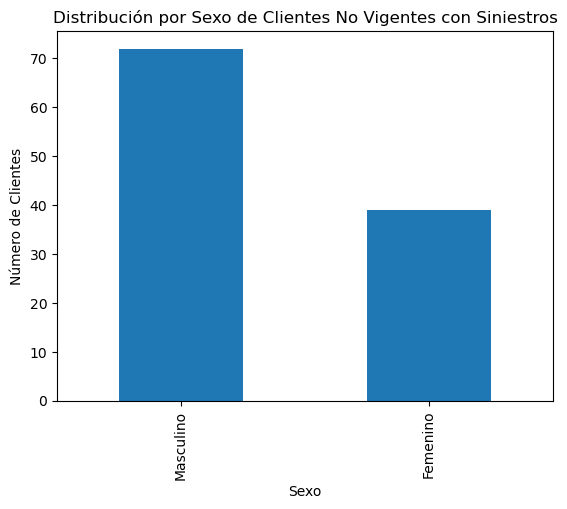

In [43]:
import matplotlib.pyplot as plt

distribucion_sexo.plot(kind='bar')
plt.title('Distribución por Sexo de Clientes No Vigentes con Siniestros')
plt.xlabel('Sexo')
plt.ylabel('Número de Clientes')
plt.show()


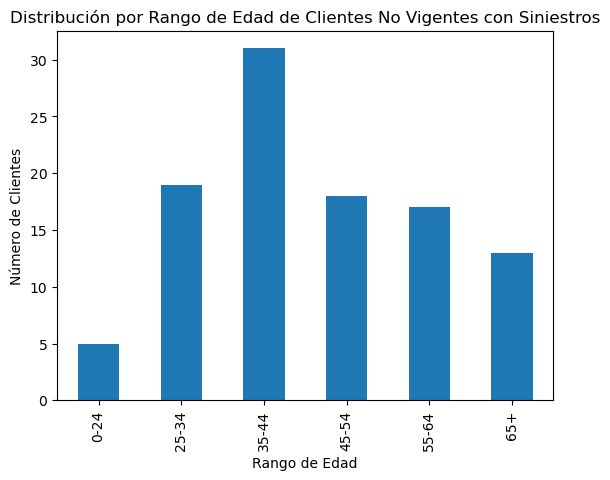

In [44]:
distribucion_edad.plot(kind='bar')
plt.title('Distribución por Rango de Edad de Clientes No Vigentes con Siniestros')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Clientes')
plt.show()


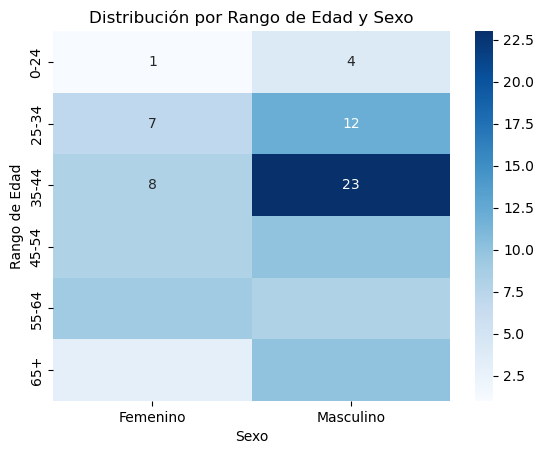

In [45]:
import seaborn as sns

sns.heatmap(tabla_socio_demografica, annot=True, fmt='d', cmap='Blues')
plt.title('Distribución por Rango de Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Rango de Edad')
plt.show()


In [46]:
# Filtrar clientes que ya no están vigentes
clientes_no_vigentes = df_unico_por_dni[df_unico_por_dni['esta_vigente'] == 0]

# Filtrar clientes que tuvieron siniestros
clientes_siniestros_no_vigentes = clientes_no_vigentes[clientes_no_vigentes['Cantidad stros gral'] > 0]


In [47]:
# Asegurar que 'fecha de nacimiento' está en formato datetime
clientes_siniestros_no_vigentes['fecha de nacimiento'] = pd.to_datetime(clientes_siniestros_no_vigentes['fecha de nacimiento'], errors='coerce')

# Calcular la edad en años
clientes_siniestros_no_vigentes['edad'] = clientes_siniestros_no_vigentes.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) else None,
    axis=1
)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\601507544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['fecha de nacimiento'] = pd.to_datetime(clientes_siniestros_no_vigentes['fecha de nacimiento'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\601507544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['edad'] = clientes_siniestros_no_vigentes.apply(


In [48]:
# Definir los nuevos intervalos de edad
bins = [0, 31, 46, clientes_siniestros_no_vigentes['edad'].max() + 1]
labels = ['Hasta 30 años', '31 a 45 años', 'Más de 46 años']

# Crear la columna 'rango_edad' con los nuevos intervalos
clientes_siniestros_no_vigentes['rango_edad'] = pd.cut(
    clientes_siniestros_no_vigentes['edad'],
    bins=bins,
    labels=labels,
    right=False
)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\2043024526.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes_siniestros_no_vigentes['rango_edad'] = pd.cut(


In [49]:
# Verificar los valores únicos en 'sexo'
print("Valores únicos en 'sexo':", clientes_siniestros_no_vigentes['sexo'].unique())

# Filtrar si es necesario (por ejemplo, excluir 'empresa' si solo te interesan personas físicas)
clientes_siniestros_no_vigentes = clientes_siniestros_no_vigentes[clientes_siniestros_no_vigentes['sexo'].isin(['Masculino', 'Femenino'])]

# Conteo de clientes por sexo
distribucion_sexo = clientes_siniestros_no_vigentes['sexo'].value_counts()
print("\nDistribución por sexo:")
print(distribucion_sexo)


Valores únicos en 'sexo': ['Femenino' 'Masculino']

Distribución por sexo:
sexo
Masculino    72
Femenino     39
Name: count, dtype: int64


In [50]:
# Conteo por rango de edad
distribucion_edad = clientes_siniestros_no_vigentes['rango_edad'].value_counts().sort_index()
print("\nDistribución por rango de edad:")
print(distribucion_edad)



Distribución por rango de edad:
rango_edad
Hasta 30 años     14
31 a 45 años      43
Más de 46 años    46
Name: count, dtype: int64


In [51]:
# Tabla cruzada de rango de edad y sexo
tabla_socio_demografica = pd.crosstab(
    clientes_siniestros_no_vigentes['rango_edad'],
    clientes_siniestros_no_vigentes['sexo']
)
print("\nDistribución por rango de edad y sexo:")
print(tabla_socio_demografica)



Distribución por rango de edad y sexo:
sexo            Femenino  Masculino
rango_edad                         
Hasta 30 años          5          9
31 a 45 años          12         31
Más de 46 años        19         27


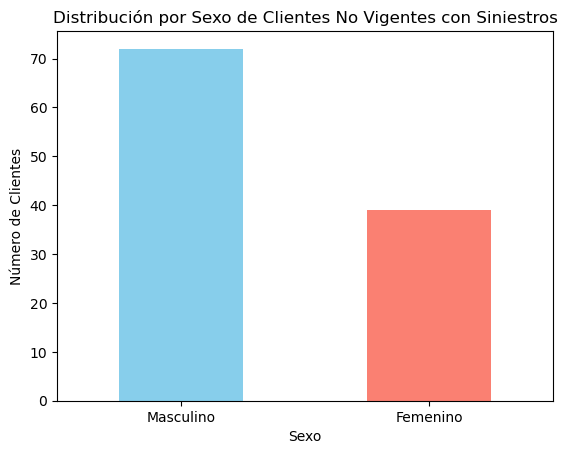

In [52]:
import matplotlib.pyplot as plt

distribucion_sexo.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución por Sexo de Clientes No Vigentes con Siniestros')
plt.xlabel('Sexo')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()


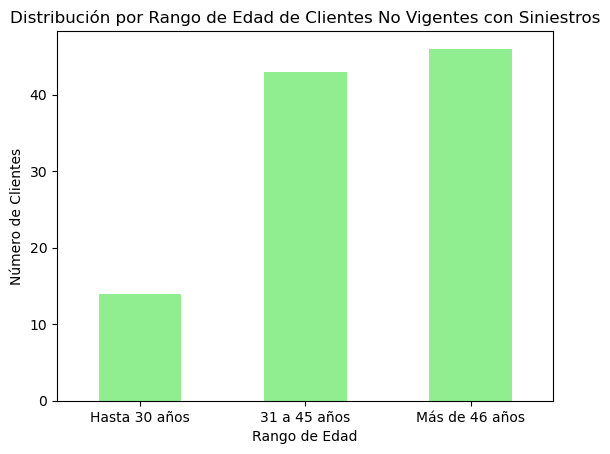

In [53]:
distribucion_edad.plot(kind='bar', color='lightgreen')
plt.title('Distribución por Rango de Edad de Clientes No Vigentes con Siniestros')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()


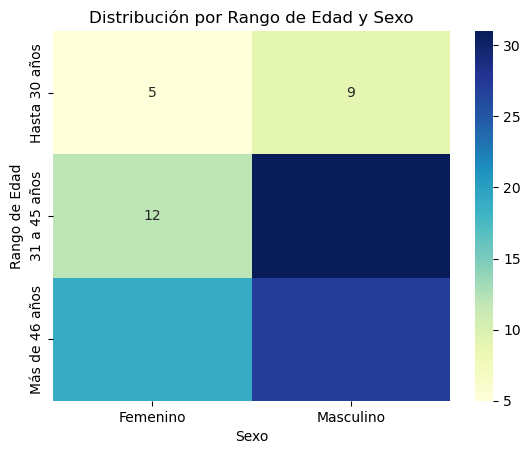

In [54]:
import seaborn as sns

sns.heatmap(tabla_socio_demografica, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribución por Rango de Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Rango de Edad')
plt.show()


In [55]:
# Tabla cruzada de rango de edad y sexo en porcentajes
tabla_socio_demografica_pct = pd.crosstab(
    clientes_siniestros_no_vigentes['rango_edad'],
    clientes_siniestros_no_vigentes['sexo'],
    normalize='index'  # Normaliza por fila (rango de edad)
) * 100

# Redondear los porcentajes a dos decimales para mayor legibilidad
tabla_socio_demografica_pct = tabla_socio_demografica_pct.round(2)

# Mostrar la tabla de porcentajes
print("\nDistribución porcentual por rango de edad y sexo:")
print(tabla_socio_demografica_pct)



Distribución porcentual por rango de edad y sexo:
sexo            Femenino  Masculino
rango_edad                         
Hasta 30 años      35.71      64.29
31 a 45 años       27.91      72.09
Más de 46 años     41.30      58.70


In [56]:
# Asegurar que 'fecha de nacimiento' y 'Fecha' están en formato datetime
df['fecha de nacimiento'] = pd.to_datetime(df['fecha de nacimiento'], errors='coerce')
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Calcular la edad en años para todos los clientes
df['edad'] = df.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) and pd.notnull(row['Fecha']) else None,
    axis=1
)

# Definir los nuevos intervalos de edad
bins = [0, 31, 46, df['edad'].max() + 1]
labels = ['Hasta 30 años', '31 a 45 años', 'Más de 46 años']

# Crear la columna 'rango_edad' con los nuevos intervalos
df['rango_edad'] = pd.cut(
    df['edad'],
    bins=bins,
    labels=labels,
    right=False
)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\1521172120.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha de nacimiento'] = pd.to_datetime(df['fecha de nacimiento'], errors='coerce')


In [57]:
# Definir las fechas para julio y agosto de 2024
fecha_julio_2024_inicio = pd.to_datetime('2024-07-01')
fecha_agosto_2024_fin = pd.to_datetime('2024-08-31')

# Identificar los DNIs de los clientes vigentes en julio y agosto de 2024
dnies_vigentes = df[
    (df['Fecha'] >= fecha_julio_2024_inicio) & 
    (df['Fecha'] <= fecha_agosto_2024_fin)
]['DNI'].unique()

# Crear la columna 'esta_vigente' en df
df['esta_vigente'] = df['DNI'].apply(
    lambda x: 1 if x in dnies_vigentes else 0
)


In [58]:
# Eliminar valores nulos en 'sexo' y 'rango_edad'
df_filtered = df.dropna(subset=['sexo', 'rango_edad'])

# Filtrar por sexo (opcional), si deseas excluir 'empresa'
df_filtered = df_filtered[df_filtered['sexo'].isin(['Masculino', 'Femenino'])]


In [59]:
# Calcular el total de clientes por grupo ('sexo', 'rango_edad')
total_por_grupo = df_filtered.groupby(['sexo', 'rango_edad']).size().reset_index(name='total_clientes')

# Calcular el número de clientes no vigentes por grupo
no_vigentes_por_grupo = df_filtered[df_filtered['esta_vigente'] == 0].groupby(['sexo', 'rango_edad']).size().reset_index(name='no_vigentes')

# Combinar ambos DataFrames
tabla_merged = pd.merge(total_por_grupo, no_vigentes_por_grupo, on=['sexo', 'rango_edad'], how='left')

# Reemplazar valores NaN en 'no_vigentes' por 0
tabla_merged['no_vigentes'] = tabla_merged['no_vigentes'].fillna(0)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\334649497.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_grupo = df_filtered.groupby(['sexo', 'rango_edad']).size().reset_index(name='total_clientes')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\334649497.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_vigentes_por_grupo = df_filtered[df_filtered['esta_vigente'] == 0].groupby(['sexo', 'rango_edad']).size().reset_index(name='no_vigentes')


In [60]:
# Calcular el porcentaje de clientes no vigentes
tabla_merged['porcentaje_no_vigentes'] = (tabla_merged['no_vigentes'] / tabla_merged['total_clientes']) * 100

# Redondear a dos decimales
tabla_merged['porcentaje_no_vigentes'] = tabla_merged['porcentaje_no_vigentes'].round(2)

# Mostrar la tabla final
print(tabla_merged)


        sexo      rango_edad  total_clientes  no_vigentes  \
0   Femenino   Hasta 30 años            5146          788   
1   Femenino    31 a 45 años           17498         1895   
2   Femenino  Más de 46 años           20224         1969   
3  Masculino   Hasta 30 años            6925         1310   
4  Masculino    31 a 45 años           27299         3597   
5  Masculino  Más de 46 años           30237         3354   

   porcentaje_no_vigentes  
0                   15.31  
1                   10.83  
2                    9.74  
3                   18.92  
4                   13.18  
5                   11.09  


In [61]:
# Pivotar la tabla para una mejor visualización
tabla_pivot = tabla_merged.pivot(index='rango_edad', columns='sexo', values='porcentaje_no_vigentes')

# Mostrar la tabla pivotada
print("\nPorcentaje de clientes no vigentes por rango de edad y sexo:")
print(tabla_pivot)



Porcentaje de clientes no vigentes por rango de edad y sexo:
sexo            Femenino  Masculino
rango_edad                         
Hasta 30 años      15.31      18.92
31 a 45 años       10.83      13.18
Más de 46 años      9.74      11.09


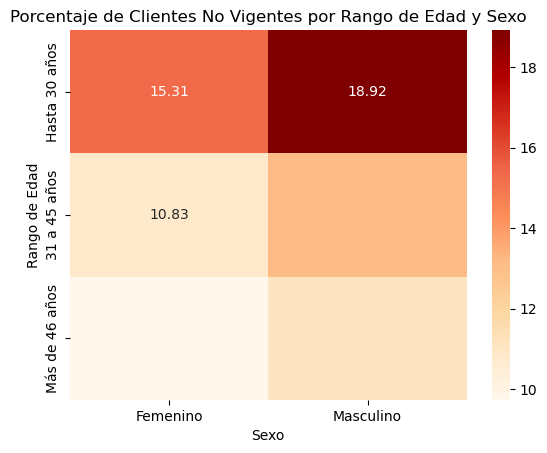

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabla_pivot, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Porcentaje de Clientes No Vigentes por Rango de Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Rango de Edad')
plt.show()


In [64]:
# Asegurar que 'Fecha' está en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Ordenar por 'DNI' y 'Fecha' para que la última fila por DNI sea la más reciente
df = df.sort_values(by=['DNI', 'Fecha'])

# Quedarse con la última fila por cliente (DNI)
df_unico_por_dni = df.drop_duplicates(subset='DNI', keep='last')


In [65]:
# Asegurar que 'fecha de nacimiento' está en formato datetime
df_unico_por_dni['fecha de nacimiento'] = pd.to_datetime(df_unico_por_dni['fecha de nacimiento'], errors='coerce')

# Calcular la edad en años
df_unico_por_dni['edad'] = df_unico_por_dni.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) else None,
    axis=1
)

# Definir los intervalos de edad
bins = [0, 31, 46, df_unico_por_dni['edad'].max() + 1]
labels = ['Hasta 30 años', '31 a 45 años', 'Más de 46 años']

# Crear la columna 'rango_edad' con los intervalos
df_unico_por_dni['rango_edad'] = pd.cut(
    df_unico_por_dni['edad'],
    bins=bins,
    labels=labels,
    right=False
)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\1244841409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico_por_dni['fecha de nacimiento'] = pd.to_datetime(df_unico_por_dni['fecha de nacimiento'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\1244841409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico_por_dni['edad'] = df_unico_por_dni.apply(
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\1244841409.py:15: SettingWithCopyWarning: 
A value is trying 

In [ ]:
# Fechas de referencia para julio y agosto de 2024
fecha_julio_2024_inicio = pd.to_datetime('2024-07-01')
fecha_agosto_2024_fin = pd.to_datetime('2024-08-31')

# Identificar los DNIs de los clientes vigentes en julio y agosto de 2024
dnies_vigentes = df_unico_por_dni[
    (df_unico_por_dni['Fecha'] >= fecha_julio_2024_inicio) & 
    (df_unico_por_dni['Fecha'] <= fecha_agosto_2024_fin)
]['DNI'].unique()

# Crear la columna 'esta_vigente'
df_unico_por_dni['esta_vigente'] = df_unico_por_dni['DNI'].apply(
    lambda x: 1 if x in dnies_vigentes else 0
)


In [66]:
# Calcular el total de clientes por grupo ('sexo', 'rango_edad')
total_por_grupo = df_unico_por_dni.groupby(['sexo', 'rango_edad']).size().reset_index(name='total_clientes')

# Calcular el número de clientes no vigentes por grupo
no_vigentes_por_grupo = df_unico_por_dni[df_unico_por_dni['esta_vigente'] == 0].groupby(['sexo', 'rango_edad']).size().reset_index(name='no_vigentes')

# Combinar ambos DataFrames
tabla_merged = pd.merge(total_por_grupo, no_vigentes_por_grupo, on=['sexo', 'rango_edad'], how='left')

# Reemplazar NaN en 'no_vigentes' con 0
tabla_merged['no_vigentes'] = tabla_merged['no_vigentes'].fillna(0)


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3127037831.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_por_grupo = df_unico_por_dni.groupby(['sexo', 'rango_edad']).size().reset_index(name='total_clientes')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3127037831.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_vigentes_por_grupo = df_unico_por_dni[df_unico_por_dni['esta_vigente'] == 0].groupby(['sexo', 'rango_edad']).size().reset_index(name='no_vigentes')


In [67]:
# Calcular el porcentaje de clientes no vigentes
tabla_merged['porcentaje_no_vigentes'] = (tabla_merged['no_vigentes'] / tabla_merged['total_clientes']) * 100

# Redondear los porcentajes a dos decimales
tabla_merged['porcentaje_no_vigentes'] = tabla_merged['porcentaje_no_vigentes'].round(2)

# Mostrar la tabla final
print(tabla_merged)


        sexo      rango_edad  total_clientes  no_vigentes  \
0   Femenino   Hasta 30 años              99           32   
1   Femenino    31 a 45 años             319           64   
2   Femenino  Más de 46 años             358           71   
3  Masculino   Hasta 30 años             159           64   
4  Masculino    31 a 45 años             447          124   
5  Masculino  Más de 46 años             508          117   

   porcentaje_no_vigentes  
0                   32.32  
1                   20.06  
2                   19.83  
3                   40.25  
4                   27.74  
5                   23.03  


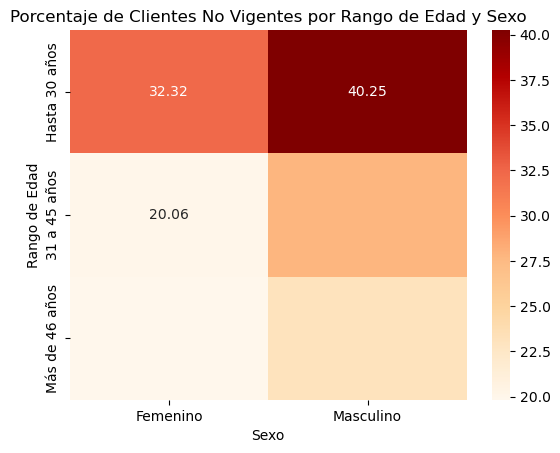

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivotar la tabla para una mejor visualización
tabla_pivot = tabla_merged.pivot(index='rango_edad', columns='sexo', values='porcentaje_no_vigentes')

# Crear el heatmap
sns.heatmap(tabla_pivot, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Porcentaje de Clientes No Vigentes por Rango de Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Rango de Edad')
plt.show()


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\1817111682.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siniestros['fecha de nacimiento'] = pd.to_datetime(df_siniestros['fecha de nacimiento'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\1817111682.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_siniestros['edad'] = df_siniestros.apply(
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\1817111682.py:18: SettingWithCopyWarning: 
A value is trying to be set 

        sexo      rango_edad  total_clientes  no_vigentes  \
0   Femenino   Hasta 30 años              31            5   
1   Femenino    31 a 45 años             114           12   
2   Femenino  Más de 46 años             144           19   
3  Masculino   Hasta 30 años              46            9   
4  Masculino    31 a 45 años             180           31   
5  Masculino  Más de 46 años             201           27   

   porcentaje_no_vigentes  
0                   16.13  
1                   10.53  
2                   13.19  
3                   19.57  
4                   17.22  
5                   13.43  


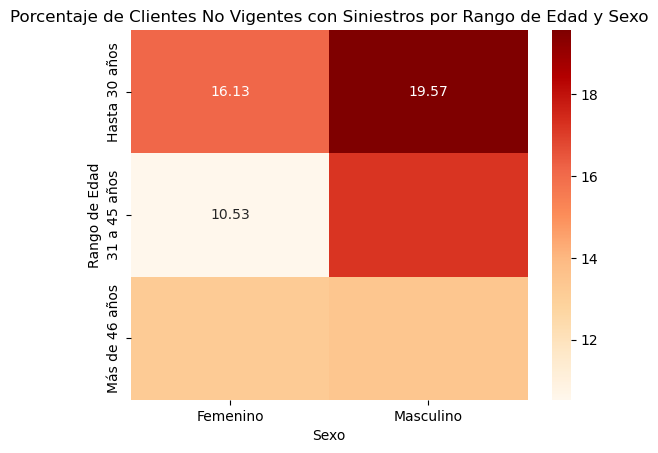

In [69]:
# Paso 1: Ordenar y quedarse con la última fila por cliente (DNI)
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values(by=['DNI', 'Fecha'])
df_unico_por_dni = df.drop_duplicates(subset='DNI', keep='last')

# Filtrar por clientes que tuvieron siniestros
df_siniestros = df_unico_por_dni[df_unico_por_dni['Cantidad stros gral'] > 0]

# Paso 2: Calcular la edad y crear los rangos de edad
df_siniestros['fecha de nacimiento'] = pd.to_datetime(df_siniestros['fecha de nacimiento'], errors='coerce')
df_siniestros['edad'] = df_siniestros.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) else None,
    axis=1
)

bins = [0, 31, 46, df_siniestros['edad'].max() + 1]
labels = ['Hasta 30 años', '31 a 45 años', 'Más de 46 años']
df_siniestros['rango_edad'] = pd.cut(
    df_siniestros['edad'],
    bins=bins,
    labels=labels,
    right=False
)

# Paso 3: Crear la columna 'esta_vigente'
fecha_julio_2024_inicio = pd.to_datetime('2024-07-01')
fecha_agosto_2024_fin = pd.to_datetime('2024-08-31')
dnies_vigentes = df_siniestros[
    (df_siniestros['Fecha'] >= fecha_julio_2024_inicio) & 
    (df_siniestros['Fecha'] <= fecha_agosto_2024_fin)
]['DNI'].unique()

df_siniestros['esta_vigente'] = df_siniestros['DNI'].apply(
    lambda x: 1 if x in dnies_vigentes else 0
)

# Paso 4: Calcular el total de clientes y no vigentes por grupo
total_por_grupo = df_siniestros.groupby(['sexo', 'rango_edad']).size().reset_index(name='total_clientes')
no_vigentes_por_grupo = df_siniestros[df_siniestros['esta_vigente'] == 0].groupby(['sexo', 'rango_edad']).size().reset_index(name='no_vigentes')

tabla_merged = pd.merge(total_por_grupo, no_vigentes_por_grupo, on=['sexo', 'rango_edad'], how='left')
tabla_merged['no_vigentes'] = tabla_merged['no_vigentes'].fillna(0)

# Paso 5: Calcular porcentaje de no vigentes
tabla_merged['porcentaje_no_vigentes'] = (tabla_merged['no_vigentes'] / tabla_merged['total_clientes']) * 100
tabla_merged['porcentaje_no_vigentes'] = tabla_merged['porcentaje_no_vigentes'].round(2)

print(tabla_merged)

# Visualización
tabla_pivot = tabla_merged.pivot(index='rango_edad', columns='sexo', values='porcentaje_no_vigentes')
sns.heatmap(tabla_pivot, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Porcentaje de Clientes No Vigentes con Siniestros por Rango de Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Rango de Edad')
plt.show()


        sexo      rango_edad  total_clientes  no_vigentes  \
0   Femenino   Hasta 30 años              68           27   
1   Femenino    31 a 45 años             205           52   
2   Femenino  Más de 46 años             214           52   
3  Masculino   Hasta 30 años             113           55   
4  Masculino    31 a 45 años             267           93   
5  Masculino  Más de 46 años             307           90   

   porcentaje_no_vigentes  
0                   39.71  
1                   25.37  
2                   24.30  
3                   48.67  
4                   34.83  
5                   29.32  


C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3616846641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_siniestros['fecha de nacimiento'] = pd.to_datetime(df_sin_siniestros['fecha de nacimiento'], errors='coerce')
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3616846641.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_siniestros['edad'] = df_sin_siniestros.apply(
C:\Users\Fernando\AppData\Local\Temp\ipykernel_20360\3616846641.py:17: SettingWithCopyWarning: 
A value is tr

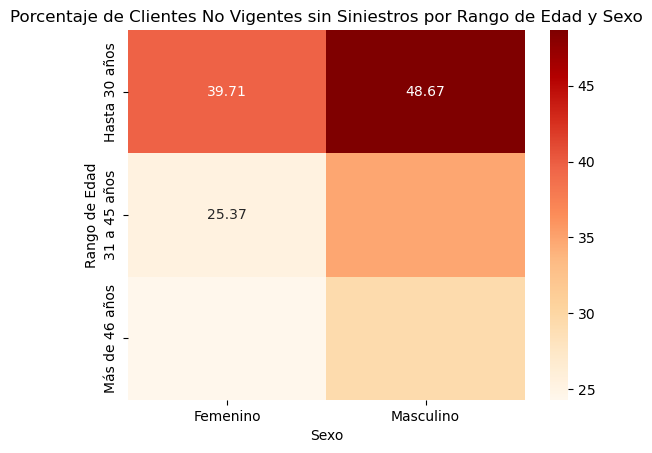

In [72]:
# Paso 1: Filtrar todos los clientes que nunca tuvieron siniestros
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.sort_values(by=['DNI', 'Fecha'])
df_unico_por_dni = df.drop_duplicates(subset='DNI', keep='last')

df_sin_siniestros = df_unico_por_dni[df_unico_por_dni['Cantidad stros gral'] == 0]

# Paso 2: Calcular la edad y crear los rangos de edad
df_sin_siniestros['fecha de nacimiento'] = pd.to_datetime(df_sin_siniestros['fecha de nacimiento'], errors='coerce')
df_sin_siniestros['edad'] = df_sin_siniestros.apply(
    lambda row: (row['Fecha'] - row['fecha de nacimiento']).days // 365 if pd.notnull(row['fecha de nacimiento']) else None,
    axis=1
)

bins = [0, 31, 46, df_sin_siniestros['edad'].max() + 1]
labels = ['Hasta 30 años', '31 a 45 años', 'Más de 46 años']
df_sin_siniestros['rango_edad'] = pd.cut(
    df_sin_siniestros['edad'],
    bins=bins,
    labels=labels,
    right=False
)

# Paso 3: Calcular el total de clientes sin siniestros por grupo
total_por_grupo = df_sin_siniestros.groupby(['sexo', 'rango_edad']).size().reset_index(name='total_clientes')

# Paso 4: Filtrar clientes no vigentes y calcular el número de no vigentes por grupo
df_no_vigentes_sin_siniestros = df_sin_siniestros[df_sin_siniestros['esta_vigente'] == 0]
no_vigentes_por_grupo = df_no_vigentes_sin_siniestros.groupby(['sexo', 'rango_edad']).size().reset_index(name='no_vigentes')

# Paso 5: Combinar ambos DataFrames y calcular el porcentaje de no vigentes
tabla_merged = pd.merge(total_por_grupo, no_vigentes_por_grupo, on=['sexo', 'rango_edad'], how='left')
tabla_merged['no_vigentes'] = tabla_merged['no_vigentes'].fillna(0)
tabla_merged['porcentaje_no_vigentes'] = (tabla_merged['no_vigentes'] / tabla_merged['total_clientes']) * 100
tabla_merged['porcentaje_no_vigentes'] = tabla_merged['porcentaje_no_vigentes'].round(2)

# Mostrar la tabla final
print(tabla_merged)

# Visualización con heatmap
tabla_pivot = tabla_merged.pivot(index='rango_edad', columns='sexo', values='porcentaje_no_vigentes')
sns.heatmap(tabla_pivot, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Porcentaje de Clientes No Vigentes sin Siniestros por Rango de Edad y Sexo')
plt.xlabel('Sexo')
plt.ylabel('Rango de Edad')
plt.show()


